In [4]:
import random
import seaborn as sns

# Part - 2
  # Drift Change

### Using Incremental Greedy

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def drift_change_greedy(steps, bandit_problems, n_actions, testbed, global_reward_list, global_optimal_action_list):
    action_count = np.zeros((bandit_problems, n_actions))
    reward_estimates = np.zeros((bandit_problems, n_actions))  # initial reward estimates set to zero
    avg_rewards_per_step = []
    optimal_action_count = np.zeros(steps)
    terminal_rewards = np.zeros(bandit_problems)  # Initialize terminal rewards array

    for step in range(steps):
        reward_sum_over_all_bandits_per_step = 0
        optimal_action_chosen_count = 0
        testbed = np.random.normal(0, 0.001, testbed.shape)  # Drift change

        for problem_index in range(bandit_problems):
            maxval = np.amax(reward_estimates[problem_index])  # Find the maximum value of the reward for that problem.
            maxval_indices = np.ravel(np.where(reward_estimates[problem_index] == maxval))  # Get the index of that reward in the problem
            random_choice = np.random.choice(maxval_indices)  # Randomly select one index from the list of indices with the highest estimated reward.

            # Generate reward
            Rn = np.random.normal(testbed[problem_index][random_choice], 1)
            action_count[problem_index][random_choice] += 1
            n = action_count[problem_index][random_choice]

            # Update reward estimate using the incremental implementation of the simple average method
            reward_estimates[problem_index][random_choice] += (Rn - reward_estimates[problem_index][random_choice]) / n

            reward_sum_over_all_bandits_per_step += Rn

            # Store terminal rewards
            if step == steps - 1:
                terminal_rewards[problem_index] = Rn

            # Check if the optimal action was chosen
            optimal_action = np.argmax(testbed[problem_index])
            if random_choice == optimal_action:
                optimal_action_chosen_count += 1

        avg_rewards_per_step.append(reward_sum_over_all_bandits_per_step / bandit_problems)
        optimal_action_count[step] = optimal_action_chosen_count / bandit_problems

    global_reward_list.append(avg_rewards_per_step)
    global_optimal_action_list.append(optimal_action_count)
    return terminal_rewards


### Fixed epsilon

In [7]:

import numpy as np
import random
import matplotlib.pyplot as plt
import itertools

def fixed_epsilon_drift(steps, bandit_problems, n_actions, testbed, epsilon):
    action_count = np.ones((bandit_problems, n_actions))
    reward_estimates = np.zeros((bandit_problems, n_actions))  # initial reward estimates set to zero
    avg_rewards_per_step = []
    optimal_action_count = np.zeros(steps)
    terminal_rewards = np.zeros(bandit_problems)  # Initialize terminal rewards array

    for step in range(steps):
        reward_sum_over_all_bandits_per_step = 0
        optimal_action_chosen_count = 0
        testbed = np.random.normal(0, 0.001, testbed.shape)  # Drift change

        for problem_index in range(bandit_problems):
            var_random = random.random()
            if var_random > epsilon:
                maxval = np.amax(reward_estimates[problem_index])  # Find the maximum value of the reward for that problem.
                maxval_indices = np.ravel(np.where(reward_estimates[problem_index] == maxval))  # Get the index of that reward in the problem
                random_choice = np.random.choice(maxval_indices)  # Randomly select one index from the list of indices with the highest estimated reward.
            else:
                random_choice = np.random.randint(n_actions)

            # Generate reward from the testbed
            Rn = np.random.normal(testbed[problem_index][random_choice], 1)
            action_count[problem_index][random_choice] += 1
            n = action_count[problem_index][random_choice]

            # Update reward estimate using the incremental implementation of the simple average method
            reward_estimates[problem_index][random_choice] += (Rn - reward_estimates[problem_index][random_choice]) / n

            reward_sum_over_all_bandits_per_step += Rn

            # Store terminal rewards
            if step == steps - 1:
                terminal_rewards[problem_index] = Rn

            # Check if the optimal action was taken
            optimal_action = np.argmax(testbed[problem_index])
            if random_choice == optimal_action:
                optimal_action_chosen_count += 1

        avg_rewards_per_step.append(reward_sum_over_all_bandits_per_step / bandit_problems)
        optimal_action_count[step] = optimal_action_chosen_count / bandit_problems

    return avg_rewards_per_step, optimal_action_count, terminal_rewards



### Epsilon with decreasing step size

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

def decreasing_epsilon_drift(steps, bandit_problems, n_actions, testbed, epsilon):
    action_count = np.ones((bandit_problems, n_actions))
    reward_estimates = np.zeros((bandit_problems, n_actions))  # initial reward estimates set to zero
    avg_rewards_per_step = []
    optimal_action_count = np.zeros(steps)
    terminal_rewards = np.zeros(bandit_problems)  # Initialize terminal rewards array
    initial_epsilon = epsilon

    for step in range(steps):
        reward_sum_over_all_bandits_per_step = 0
        optimal_action_chosen_count = 0
        testbed = np.random.normal(0, 0.001, testbed.shape)  # Drift change

        # Decreasing epsilon

        for problem_index in range(bandit_problems):
            var_random = random.random()
            if var_random > epsilon:
                maxval = np.amax(reward_estimates[problem_index])  # Find the maximum value of the reward for that problem.
                maxval_indices = np.ravel(np.where(reward_estimates[problem_index] == maxval))  # Get the index of that reward in the problem
                random_choice = np.random.choice(maxval_indices)  # Randomly select one index from the list of indices with the highest estimated reward.
            else:
                random_choice = np.random.randint(n_actions)

            # Generate reward from the testbed
            Rn = np.random.normal(testbed[problem_index][random_choice], 1)
            action_count[problem_index][random_choice] += 1
            n = action_count[problem_index][random_choice]

            # Update reward estimate using the incremental implementation of the simple average method
            reward_estimates[problem_index][random_choice] += (Rn - reward_estimates[problem_index][random_choice]) / n

            reward_sum_over_all_bandits_per_step += Rn

            # Store terminal rewards
            if step == steps - 1:
                terminal_rewards[problem_index] = Rn

            # Check if the optimal action was taken
            optimal_action = np.argmax(testbed[problem_index])
            if random_choice == optimal_action:
                optimal_action_chosen_count += 1

        epsilon = initial_epsilon/(1+step)
        avg_rewards_per_step.append(reward_sum_over_all_bandits_per_step / bandit_problems)
        optimal_action_count[step] = optimal_action_chosen_count / bandit_problems

    return avg_rewards_per_step, optimal_action_count, terminal_rewards





### Plot function

In [ ]:
def plots(title, average_reward_across_runs,optimal_action_percentage):
  # Plotting
  plt.figure(figsize=(12, 5))

  # Plot average reward
  plt.subplot(1, 2, 1)
  plt.plot(average_reward_across_runs, label='Average Reward')
  plt.xlabel('Steps')
  plt.ylabel('Average Reward')
  plt.title(title)
  plt.legend()

  # Plot percentage of optimal action
  plt.subplot(1, 2, 2)
  plt.plot(optimal_action_percentage, label='% Optimal Action')
  plt.xlabel('Steps')
  plt.ylabel('% Optimal Action')
  plt.title('% Optimal Action vs. Steps')
  plt.legend()

  plt.tight_layout()
  plt.show()

### Plotting and results

<ipython-input-10-696d88fc8df8>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Method', y='Reward', data=df, palette='Set2')


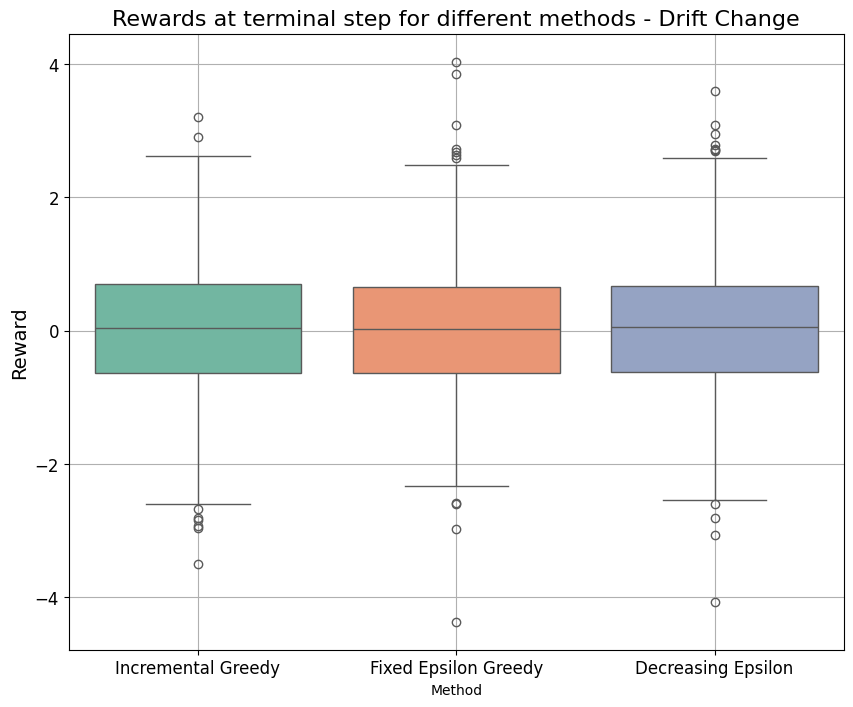

In [10]:
# Parameters
steps = 10000
bandit_problems = 1000
n_actions = 10
# Testbed: 1000 sets of ten mean parameters
testbed = np.random.normal(0, 1, (bandit_problems, n_actions))
global_reward_list = []
global_optimal_action_list = []


terminal_greedy=drift_change_greedy(steps, bandit_problems, n_actions, testbed, global_reward_list, global_optimal_action_list)
# Average reward at each time step
average_reward_across_runs = np.mean(global_reward_list, axis=0)
# Percentage of time the optimal action is taken
optimal_action_percentage = np.mean(global_optimal_action_list, axis=0) * 100
# avg_rewards_incremental_greedy = average_reward_across_runs# for box plot

# plots('Average Rewards per step using Incremental Greedy Approach for Drift Change', average_reward_across_runs, optimal_action_percentage)


epsilon = 0.1
# Testbed: 1000 sets of ten mean parameters
testbed = np.random.normal(0, 1, (bandit_problems, n_actions))
# calling the function for fixed step epsilon greedt
avg_rewards_per_step, optimal_action_count, terminal_rewards_fixed = fixed_epsilon_drift(steps, bandit_problems, n_actions, testbed, epsilon)
average_reward_across_runs = np.mean([avg_rewards_per_step], axis=0)
avg_rewards_fixed_epsilon = average_reward_across_runs # for box plot

optimal_action_percentage = np.mean([optimal_action_count], axis=0) * 100
# plots('Average Rewards per step using Fixed Epsilon Greedy Approach for Drift Change', average_reward_across_runs, optimal_action_percentage)


# Testbed: 1000 sets of ten mean parameters
testbed = np.random.normal(0, 1, (bandit_problems, n_actions))
# Percentage of time the optimal action is taken
avg_rewards_per_step, optimal_action_count,terminal_rewards_decreasing = decreasing_epsilon_drift(steps, bandit_problems, n_actions, testbed, epsilon)

average_reward_across_runs = np.mean([avg_rewards_per_step], axis=0)

optimal_action_percentage = np.mean([optimal_action_count], axis=0) * 100
# plots('Average Rewards per step using Decreasing step size epsilon for Drift Change', average_reward_across_runs, optimal_action_percentage)


all_avg_rewards = [terminal_greedy, terminal_rewards_fixed, terminal_rewards_decreasing]


# Prepare the data for seaborn
methods = ['Incremental Greedy', 'Fixed Epsilon Greedy', 'Decreasing Epsilon']
data = []

for i, method in enumerate(methods):
    for reward in all_avg_rewards[i]:
        data.append((method, reward))

# Convert to a DataFrame for seaborn
import pandas as pd

df = pd.DataFrame(data, columns=['Method', 'Reward'])

# Plotting with seaborn
plt.figure(figsize=(10, 8))
sns.boxplot(x='Method', y='Reward', data=df, palette='Set2')
# sns.stripplot(x='Method', y='Reward', data=df, color='black', alpha=0.5)

# Customizations
plt.title('Rewards at terminal step for different methods - Drift Change', fontsize=16)
# plt.xlabel('Methods', fontsize=14)
plt.ylabel('Reward', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

plt.show()

In [13]:
drift_change_avg_performance = df.groupby('Method').mean()
drift_change_avg_performance

,Reward
Method,
Decreasing Epsilon,0.053624
Fixed Epsilon Greedy,0.010889
Incremental Greedy,0.005384


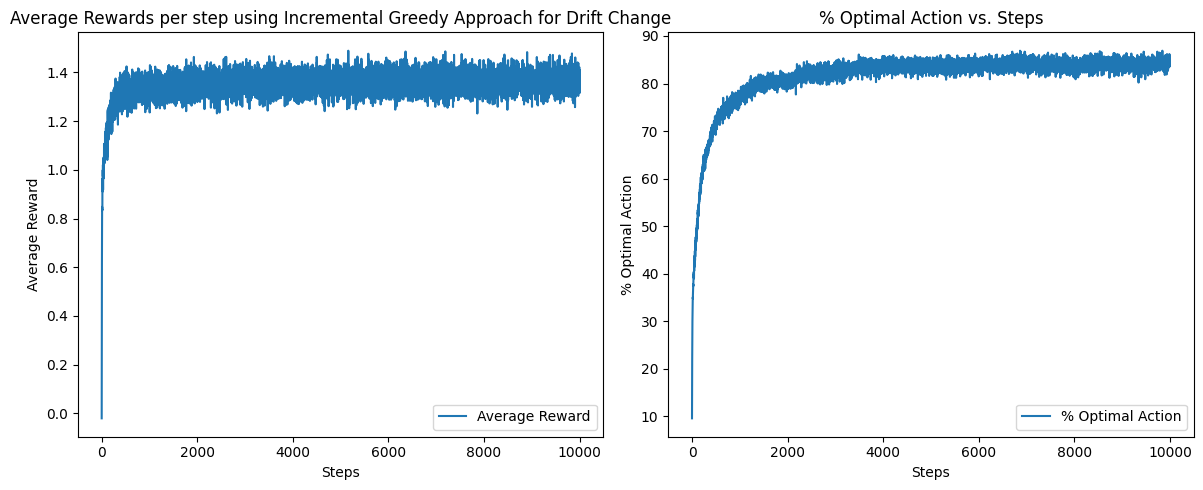

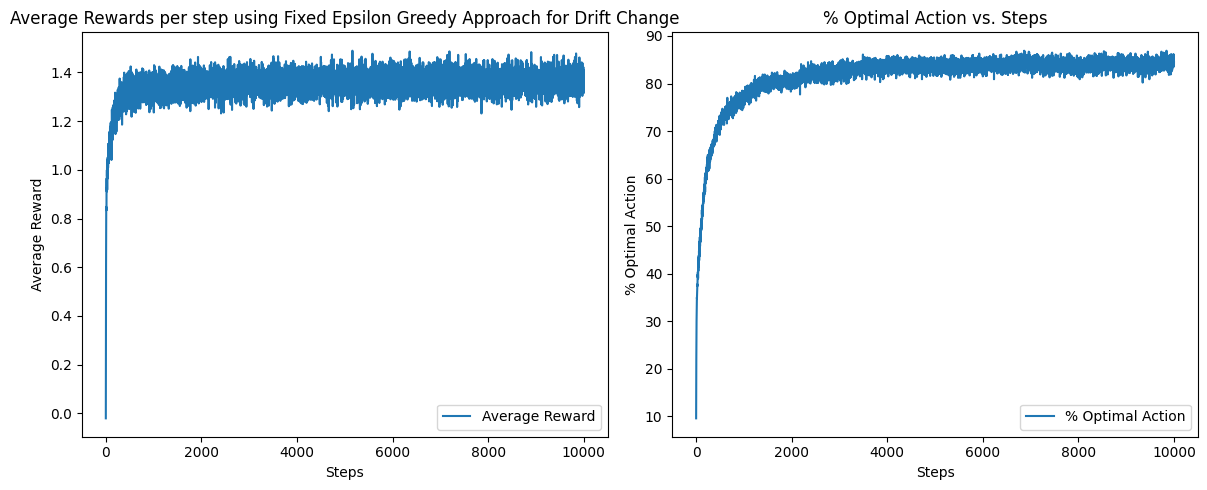

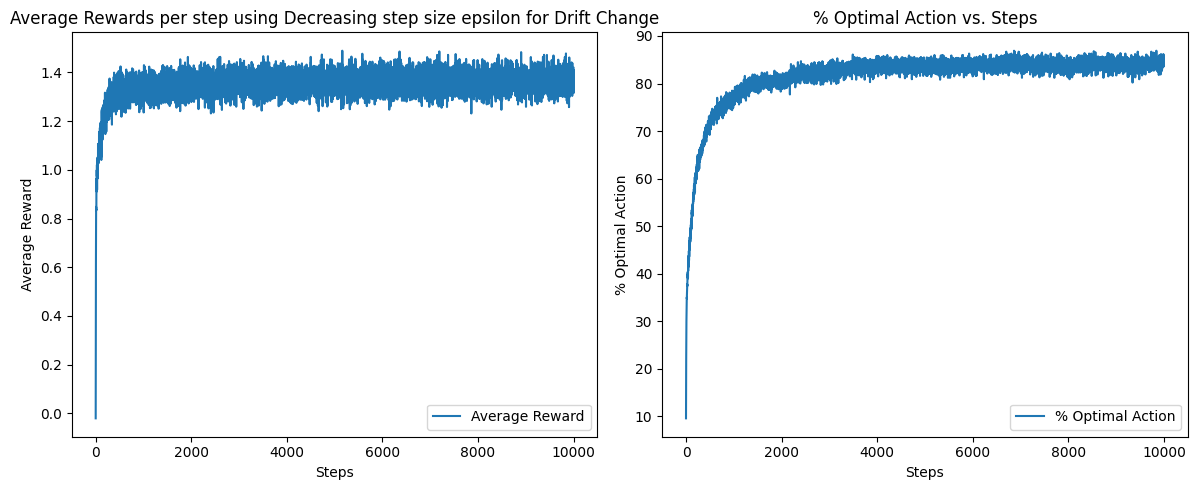

In [ ]:
plots('Average Rewards per step using Incremental Greedy Approach for Drift Change', average_reward_across_runs, optimal_action_percentage)
plots('Average Rewards per step using Fixed Epsilon Greedy Approach for Drift Change', average_reward_across_runs, optimal_action_percentage)

plots('Average Rewards per step using Decreasing step size epsilon for Drift Change', average_reward_across_runs, optimal_action_percentage)
